# **AISaturdays Ocean Proximity Challenge**

![AISaturdays](https://www.saturdays.ai/assets/images/ai-saturdays-122x122.png)

Bienvenido al reto de **AISaturdays** de Inteligencia Artificial del curso de Deep Learning.

En este ejercicio trataremos de predecir la proximidad del océano con respecto a un conjunto de viviendas.

**Enlaces:**
- AISaturdays Deep Learning [temario clase 1](https://app.eduflow.com/courses/d4d36f90-f65e-4ede-b8f3-16f498ce3a33/flows/98016aaa-4e29-428f-a8f9-d5d9477d7274/activities/d9f00e62-0403-4a21-bdae-c6a3ea2984e5).
- Ejercicio Kaggle: https://www.kaggle.com/camnugent/california-housing-prices

**Instrucciones:**
- Se usará el lenguaje de programación Python 3.
- Se usarán las librerías de python: *Pandas, MatPlotLib, Numpy, Scikit-learn, Keras,TensorFlow*.

**Mediante este ejercicio, aprenderemos:**
- Entender y ejecutar los NoteBooks con Python.
- Ser capaz de utilizar funciones de Python y librerías adicionales.
- Dataset:
 - Obtener el dataset y previsualizar la información del dataset.
 - Limpiar y normalizar la información del dataset.
 - Representar y analizar la información del dataset.
- Crear y entender el concepto de "*Conjunto de datos de entrenamiento*" y "*Conjuntos de datos de test*"
- Crear y entender el concepto de "*Modelo de redes neuronales*" para procesar los datos,  predecir y obtener conclusiones.
- Mejorar la predicción y evitar overfitting.


¡Empecemos!

#1. Importación de librerías


*Importaremos* las herramientas que vamos a utilizar.
Para ejecutar cada celda(caja), pulsa el play de la izquierda o **Ctrl + Enter**.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import seaborn as sns

#2. Dataset
![texto alternativo](https://i.imgur.com/TMvhIbd.png)

### Obtener el dataset y previsualizar la información del dataset.

¡Nuestra tabla! Para poder visualizar y limpiar los datos convertiremos el archivo CSV.

Los datos se almacenarán en un dataframe llamado **df**.

In [3]:
# Sólo con una línea de código
df = pd.read_csv(r'housing.csv')

1. Tu turno. Muestra los primeros valores del archivo CSV para hacernos una idea del contenido de la tabla con el código: df.head()


---

In [5]:
# Sólo con una línea de código
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Variables

* **longitude:** Valor longitude de la coordenada.
* **latitude:** Valor latitude de la coordenada.
* **housing_median_age:** Edad media de las viviendas de esta zona.
* **total_rooms:** Total de habitaciones.
* **total_bedrooms:** Total de camas.
* **population:** Población en esta zona. Importante denotar que también es un valor total.
* **households:** Viviendas en esta zona. Importante denotar que también es un valor total.
* **median_income:** Salario medio de las personas de esta zona.
* **median_house_value:** Valor medio de la vivienda de esta zona.
* **ocean_proximity:**  ¡El resultado! Significa la proximidad del océano con respecto a las viviendas de esta zona. Si nos fijamos, este campo contiene valores de cadena (etiquetas) para determinar la proximidad.



### Analizar dataset:

Para entender la distribución de los datos, vamos a observar:

- La cantidad de datos (count)
- La distribución de los datos mediante cuartiles (25%,50%,75%)
- Media de los datos (mean)
- Mínimos y máximos (min, max)
- Varianza (std)
- ...

2. Utiliza la función .describe() para analizar la distribución de los datos


---

In [6]:
# Sólo con una línea de código
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Visualicemos el contenido para hacernos una idea de la distribución de las viviendas por población y precio.

*   Es la zona de California, y al suroeste donde terminan los círculos, comieza el océano.
![California](https://california.azureedge.net/cdt/CAgovPortal/images/Uploads/menu-living.jpg)
*   El precio se indica con color rojo para las viviendas más caras.
*   Las viviendas más cercanas al océano se encuentran por lo tanto en la costa de California.




<Figure size 720x504 with 0 Axes>

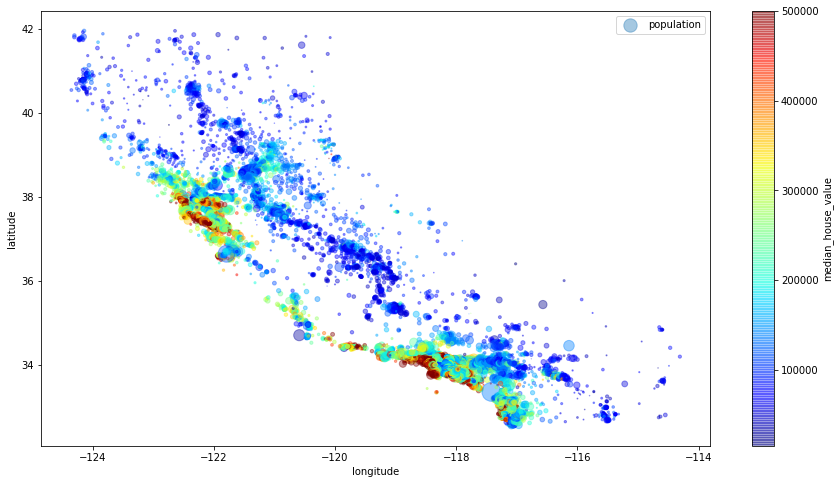

In [7]:
# Ejecutar el siguiente código
plt.figure(figsize=(10,7))
plotter = df.copy()
plotter.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=plotter["population"]/100, label="population", figsize=(15,8), c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True, )
plt.legend()

### Limpiar y normalizar la información del dataset
![texto alternativo](https://i.imgur.com/8u4xTI7.png)

En este apartado se pretende corregir y mejorar información en el dataset que pueda faltar, sea inconsistente o no sea correcta.

Este paso es necesario para mejorar cualquier predicción futura que se realice con el dataset.

Existen diferentes técnicas para corregir y mejorar la calidad e integridad de información de nuestro dataset. 

Como futura lectura, recomendamos el siguiente enlace con [técnicas de mejora del dato](https://www.kaggle.com/pavansanagapati/simple-tutorial-how-to-handle-missing-data).



3. Muestra el sumatorio de los valores nulos del dataset: df.isnull()...
[Documentación](https://datascience.stackexchange.com/questions/12645/how-to-count-the-number-of-missing-values-in-each-row-in-pandas-dataframe)


---

In [8]:
# Sólo con una línea de código
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

4. Elimina las filas que tengan valores a 0: df.dropna(...) [Documentación](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

---

In [9]:
# Sólo con una línea de código
df = df.dropna()

In [10]:
#test
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### Analizar relaciones de la información del dataset

5. ¿Cual de estas variables está relacionada con la proxímidad del océano y cúal no? ¿Están relacionadas entre sí? **Explícalo a continuación**

---

A mayor cercanía de la costa, mayor valor.




---

Crear una matriz de correlación visual. [Pista](https://datascienceplus.com/visualize-correlation-matrices-in-python/)

6. Crea una matriz de correlación visual usando .corr()


---

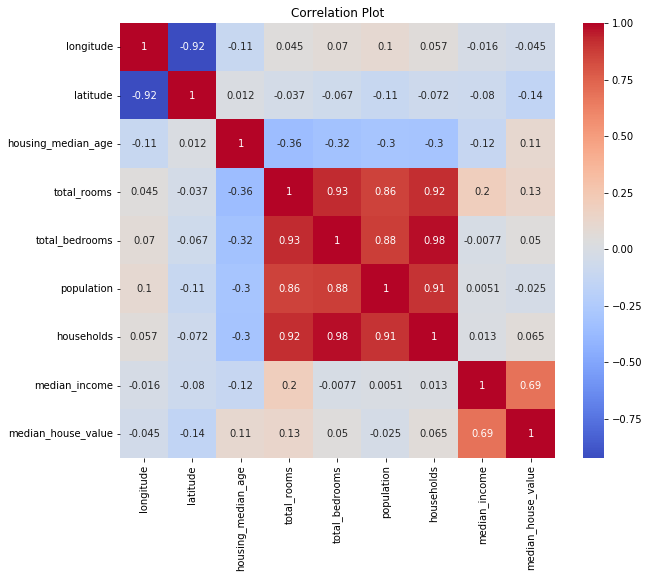

In [11]:
# Dos líneas de código
corr_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))  # Set the figure size (optional)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Plot')  # Add a title to the heatmap
plt.show()

! Fíjate en todas posibles feature de la tabla de arriba que indican "**valores  totales**". (Pista: algunas de ellas no llevan el prefijo *total_* )

Estas features de totales nos indican los valores en una zona concreta de un grupo de viviendas. Para mejorar la predicción de nuestro modelo, nos conviene obtener los valores individuales por vivienda.

Los datasets no suelen ser perfectos, hay datos incompletos e incorrectos que reducen la eficiencia del modelo. Por ello necesitamos limpiarlo. [Pista](https://new.paradigmadigital.com/wp-content/uploads/2019/02/Pandas_cheatsheet.pdf)

7. ¿Qué features están agrupadas por totales? ¿Con qué feature se agrupan y tienen más relación? (Pista: hay tres)

---

In [12]:
corr_matrix[['total_bedrooms', 'total_rooms', 'population', 'households']]

,total_bedrooms,total_rooms,population,households
longitude,0.069608,0.045480,0.100270,0.056513
latitude,-0.066983,-0.036667,-0.108997,-0.071774
housing_median_age,-0.320451,-0.360628,-0.295787,-0.302768
total_rooms,0.930380,1.000000,0.857281,0.918992
total_bedrooms,1.000000,0.930380,0.877747,0.979728
population,0.877747,0.857281,1.000000,0.907186
households,0.979728,0.918992,0.907186,1.000000
median_income,-0.007723,0.197882,0.005087,0.013434
median_house_value,0.049686,0.133294,-0.025300,0.064894


8. De las feature agrupadas por totales, obtén las feature invididuales dividiéndolas por las que las agrupa, y añádelas al dataframe
---

In [13]:
# Tres líneas de código
df['bedrooms'] = df['total_bedrooms']/df['households']
df['rooms'] = df['total_rooms']/df['households']
df['population'] = df['population']/df['households']

9. Elimina del dataset las feature de totales agrupadas
---

In [14]:
# Sólo con una línea de código
df.drop(['total_bedrooms', 'total_rooms'], axis=1, inplace=True)

10. Crea de nuevo una matriz de correlación visual usando .corr() para ver las nuevas feature añadidas y su correlación


---

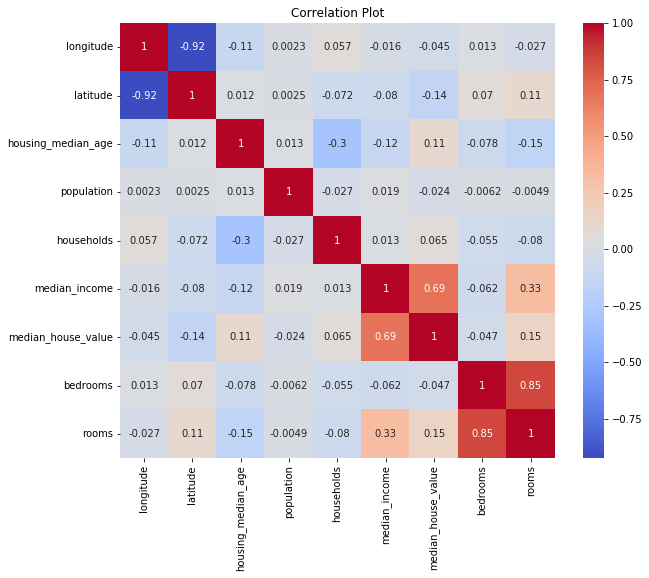

In [16]:
# Dos líneas de código
corr_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))  # Set the figure size (optional)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Plot')  # Add a title to the heatmap
plt.show()

! Fíjate como ahora al haber procesado y quitado las feature de totales, hemos eliminado algunas correlaciones y la matriz nos muestra correlaciones más coherentes que nos ayudarán a mejorar la predicción de nuestro modelo.



13. Obtén los valores únicos de la feature de la que queremos obtener la predicción (ocean_proximity)


---

In [17]:
# Dos líneas de código
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

*14*. Explica qué ves en los valores anteriores. 


---

*   Explica aquí qué ves en los valores anteriores que deba mejorarse
    -Es necesario eliminar los caracteres especiales y sustituir espacios.



---

15. Mejora el dataframe con el análisis anterior


---

In [18]:
# Sólo con una línea de código
df['ocean_proximity'] = df['ocean_proximity'].str.replace(' ', '-', regex=False).str.replace('<', '', regex=False)

### Normalizar las feature para nuestro modelo

![texto alternativo](https://i.imgur.com/o7YvGRe.png)


Ahora deberemos proceder a normalizar el resto de variables para que la escala de valores entre ellas sea similar y facilite el procesamiento a nuestro modelo y se logre mejorar la predicción (*Feature Scaling*).
Este paso es fundamental antes de entrenar nuestro modelo.

Puesto que la **función de activación** de nuestro modelo será '**softmax**', cuyos valores son de una escala entre -1 a 1, debemos normalizar las feature en este intervalo. [Pista](https://books.google.es/books?id=M5RRDwAAQBAJ&pg=PA137&lpg=PA137&dq=scaler.fit_transform+values.reshape&source=bl&ots=zzDuEQUdQR&sig=ACfU3U1NPGvTLq46zc-pJwcexE3wGKHQPw&hl=es&sa=X&ved=2ahUKEwi1qtPZ9MDnAhXdDWMBHc-MB0UQ6AEwDXoECAgQAQ#v=onepage&q=scaler.fit_transform%20values.reshape&f=false)

16. Normaliza las feature a la escala de softmax y añádelas al dataframe.


---

In [21]:
# Seis líneas de código (cómo mínimo)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
columns = df.select_dtypes(include=['int64', 'float64']).columns
df[columns] = scaler.fit_transform(df[columns])
columns

Index(['longitude', 'latitude', 'housing_median_age', 'population',
       'households', 'median_income', 'median_house_value', 'bedrooms',
       'rooms'],
      dtype='object')

17. Utiliza la función .describe() para analizar la distribución de los datos


---

In [22]:
# Sólo con una línea de código
df.describe()

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,bedrooms,rooms
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-0.047946,-0.342567,0.083651,-0.996171,-0.836069,-0.535005,-0.208806,-0.954720,-0.934991
std,0.399119,0.454059,0.493796,0.016800,0.125736,0.261968,0.476021,0.028228,0.035203
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.492032,-0.704570,-0.333333,-0.997205,-0.908239,-0.715342,-0.569070,-0.960117,-0.949026
50%,0.167331,-0.634431,0.098039,-0.996579,-0.865812,-0.581164,-0.320823,-0.957576,-0.937835
75%,0.262948,0.100956,0.411765,-0.995833,-0.801677,-0.414615,0.029691,-0.954567,-0.926186
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 3. Modelo redes neuronales

El modelo de [redes neuronales](https://pathmind.com/wiki/neural-network) es una serie de algoritmos que logran reconocer patrones y correlaciones en un conjunto de datos a través de un proceso que simula el funcionamiento del cerebro con la finalidad de determinar predicciones que puedan interesarnos.

En Deep Learning uno de los usos más frecuentes del modelo de redes neuronales es el caso de análisis de datos en [aprendizaje supervisado](https://es.wikipedia.org/wiki/Aprendizaje_supervisado).



**Ejemplo genérico de Red Neuronal**

![texto alternativo](https://pathmind.com/images/wiki/perceptron_node.png)

**Ejemplo de Red Neuronal Clasificador con función de activación SoftMax**

![Modelo](https://i.imgur.com/wcOwh5O.png)


**Ejemplo**
- Dado un conjunto de emails, determinar cuál es spam y cuál no.
- Dado un conjunto de imágenes de animales, determinar cuáles son perros.
- Detectar partes del cuerpo en imágenes o gestos.
- Detectar voces, transcripciones, textos..

**Objetivo**
- En este reto, queremos lograr **clasificar** aquellas viviendas según a la cercanía que estén del océano. Es un ejercicio de **clasificación**.
- A continuación puede visualizarse la diferencia entre "clasificación" y "regresión"
![Clasificación vs regresión](https://res.cloudinary.com/practicaldev/image/fetch/s--c4Lfzdwy--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://thepracticaldev.s3.amazonaws.com/i/mjshszqx4fj22hs12vfn.png)

**Implementación**
- Crear un conjunto de datos de entrenamiento y un conjunto de datos de test
- Crear un modelo de red neuronal con Keras:
  - Tipo de modelo: [tipo de algoritmo](https://www.javatpoint.com/classification-algorithm-in-machine-learning): *Sequential*
  - Añadir 7 capas Dense.
  - La primera capa densa llevará seteada el número de features con las que se entrena el modelo, sin contar con la que queremos averiguar.
  - Las seis primeras capas llevarán la función de activación 'relu'.
  - La última capa llevará la función de activación 'softmax'.
- Compilar el modelo con:
  - Los "datos de entrenamiento" y de las "features" que queremos tener en cuenta para el entrenamiento.
  - Función de activación: 'softmax'. [Pista](https://developers.google.com/machine-learning/crash-course/multi-class-neural-networks/softmax?hl=es-419)
  - Función de pérdida: 'categorical_crossentropy'. [Pista](https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/categorical-crossentropy)
  - Función de optimización: 'adam'. [Pista](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)
- Entrenar el modelo con los "datos de entrenamiento" y de las "features" que queremos tener en cuenta para el entrenamiento y los datos de validación.
- Determinar las conclusiones de los resultados obtenidos en el modelo.

Creación del modelo de redes neuronales

18. Crea el set de datos de entrenamiento y validación necesarios para nuestro modelo

---

In [24]:
from sklearn.preprocessing import LabelEncoder
# Crea X , que sea igual al dataframe menos la feature que queremos averiguar.
# Sólo una línea de código
X = df.drop('ocean_proximity', axis=1)

# Crea y , con un LabelEncoder para pasar a enteros los valores que tiene la feature que queremos averiguar
# Dos lineas de código
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(df['ocean_proximity'])

# Crea el set de datos de entrenamiento y validación.
# Sólo una línea de código
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Convierte y_train y y_test al formato que se necesita par entrenar nuestro modelo con: np_utils.to_categorical
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

19. Crea y compila el modelo como se indican en los pasos de implementación descritos anteriormente

---

In [25]:
# Importar librerías keras
import keras.metrics as metrics
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Activation
from keras.callbacks import EarlyStopping

# Crear el modelo secuencial
# Sólo una línea de código
model = Sequential()

# Añadir 7 capas Dense con sus propiedades como se indica en la implementación
# Siete líneas de código
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
for _ in range(5):
    model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=y_train_categorical.shape[1], activation='softmax'))
# Compilar el modelo como se indica en la implementacióbn
# Sólo una línea de código
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




20. Explica los siguientes conceptos
---
- ¿Por qué se ha utilizado el tipo de modelo 'Sequential'
- ¿Qué valor debe tener input_dim y que feature no se debe contabilizar?
- ¿Qué función de activación se ha seteado en la última capa?
- ¿Por qué se ha elegido esa función de activación en la última capa?
- ¿Por qué se ha elegido 'categorical_crossentropy' en la función de pérdida?
- ¿Qué significa la terminología de función de optimización?


*Escribe aquí las respuestas

In [26]:
# Visualizar el resultado de la compilación del modelo
# Sólo una línea de código
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 5)                

21. Entrena finalmente el modelo con los parámetros necesarios: X_train, Y_train, epochs=???, batch_size=???, validation_data=(X_test,Y_test)
---
- El set de entrenamiento Y_train debe esta previamente convertido al formato que necesita el modelo. No se debe usar directamente el obtenido de train_test_split(...)
- Prueba con diferentes epochs (iteraciones): 10, 100, 500, 1000.
- Prueba con diferentes batch_size: 10, 200, 1000, 100000.

---

In [27]:
#Usa este EarlyStopping para conseguir un mejor modelo
es = EarlyStopping(monitor='val_loss', mode='min', verbose=2, restore_best_weights=True,patience=10)
# Sólo con una línea de código. Recuerda guardar el historial de entrenamiento para los siguientes pasos.
history = model.fit(X_train, y_train_categorical, validation_data=(X_test, y_test_categorical), epochs=100, callbacks=[es], verbose=2)



Epoch 1/100
511/511 - 3s - loss: 0.6418 - accuracy: 0.7498 - val_loss: 0.3200 - val_accuracy: 0.8671
Epoch 2/100
511/511 - 2s - loss: 0.3228 - accuracy: 0.8710 - val_loss: 0.2852 - val_accuracy: 0.8931
Epoch 3/100
511/511 - 2s - loss: 0.2788 - accuracy: 0.8855 - val_loss: 0.2242 - val_accuracy: 0.9034
Epoch 4/100
511/511 - 2s - loss: 0.2571 - accuracy: 0.8940 - val_loss: 0.2893 - val_accuracy: 0.8804
Epoch 5/100
511/511 - 2s - loss: 0.2280 - accuracy: 0.9033 - val_loss: 0.2676 - val_accuracy: 0.8862
Epoch 6/100
511/511 - 2s - loss: 0.2339 - accuracy: 0.9031 - val_loss: 0.2575 - val_accuracy: 0.8994
Epoch 7/100
511/511 - 2s - loss: 0.2250 - accuracy: 0.9037 - val_loss: 0.1916 - val_accuracy: 0.9183
Epoch 8/100
511/511 - 2s - loss: 0.2086 - accuracy: 0.9106 - val_loss: 0.2082 - val_accuracy: 0.9065
Epoch 9/100
511/511 - 2s - loss: 0.2049 - accuracy: 0.9132 - val_loss: 0.1764 - val_accuracy: 0.9210
Epoch 10/100
511/511 - 2s - loss: 0.2044 - accuracy: 0.9130 - val_loss: 0.1930 - val_accura

In [28]:
# Evalua el modelo con los datos de X_test y Y_test
loss, accuracy = model.evaluate(X_test, y_test_categorical, verbose=0)

print(f"Check de datos perdidos: {loss}")
print(f"Precisión de validación conjunto: {accuracy}")

Check de datos perdidos: 0.1292220652103424
Precisión de validación conjunto: 0.9481282234191895


22. Explica qué ocurre con diferentes epochs y batch_size
---
- ¿Qué ocurre con demasiados epochs? [Pista](#https://stats.stackexchange.com/questions/384593/why-too-many-epochs-will-cause-overfitting)
- ¿Qué ocurre con un valor demasiado grande de batch_size?


---

*Escribe aquí las respuestas:

Demasiadas epochs generan overfitting.
Batch sizes demasiado grandes son muy rápidas per epoch pero también generan overfiting.
Batch sizes demasiado pequeñas tardan demasiado.

Función auxiliar para ver la gráfica de la ejecución del modelo

In [29]:
# FUNCIÓN AUXILIAR, EJECUTAR, NO MODIFICAR.
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # Summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

23. Imprime las gráficas de entrenamiento del modelo
---


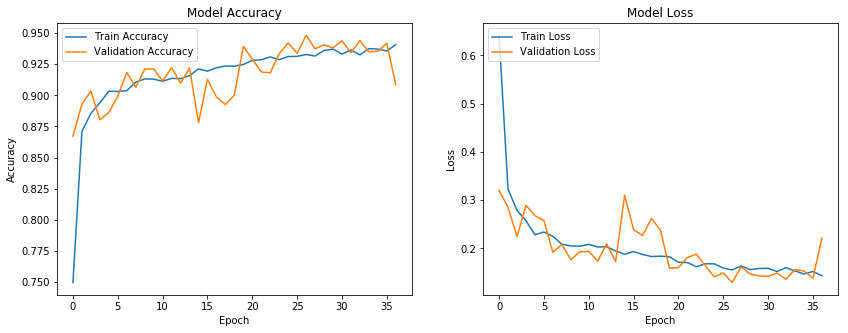

In [32]:
# Sólo con una línea de código
plt.figure(figsize=(14, 5)); plt.subplot(1, 2, 1); plt.plot(history.history['accuracy'], label='Train Accuracy'); plt.plot(history.history['val_accuracy'], label='Validation Accuracy'); plt.title('Model Accuracy'); plt.ylabel('Accuracy'); plt.xlabel('Epoch'); plt.legend(loc='upper left'); plt.subplot(1, 2, 2); plt.plot(history.history['loss'], label='Train Loss'); plt.plot(history.history['val_loss'], label='Validation Loss'); plt.title('Model Loss'); plt.ylabel('Loss'); plt.xlabel('Epoch'); plt.legend(loc='upper left'); plt.show()

24. Analiza y explica qué indica la gráfica del modelo
---
- Explica la gráfica de Accuracy
    
    La gráfica de precisión muestra dos curvas: la precisión durante el entrenamiento y la precisión durante la validación. La precisión de entrenamiento es    estable a lo largo de las iteraciones, lo que indica un buen rendimiento del modelo con los datos de entrenamiento. La precisión de validación, aunque     empieza más baja, aumenta rápidamente y casi se alinea con la de entrenamiento, lo que sugiere que el modelo generaliza bien y no hay un sobreajuste    significativo.
- Explica la gráfica de Loss

    La gráfica de pérdida muestra la pérdida durante el entrenamiento y la validación. La pérdida de entrenamiento desciende rápidamente y se estabiliza, lo que es indicativo de que el modelo aprende de manera efectiva. La pérdida de validación, aunque muestra más variabilidad y algunos picos, tiende a disminuir, lo cual es positivo y señala que el modelo está aprendiendo correctamente.

# 4. Mejorar la predicción

Mejorar la predicción y resultado de nuestro modelo es posible:

*   Aumentar el dataset o mejorar la calidad de los datos existentes.
*   **Optimizar hyperparámetros** de nuestro conjunto de datos y de nuestro modelo.

A continuación se pretende mejorar la predicción mediante la "*optimización de hyperparámetros*".

25. Intenta mejorar la predicción del modelo anterior modificando los hyperparámetros de la creación del set de datos de entrenamiento y validación: random_state
---

In [37]:
# Escribe aquí el código
import random

num_iterations = 5
results = []

for _ in range(num_iterations):
    random_state = random.randint(0, 10)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    y_train_categorical = to_categorical(y_train)
    y_test_categorical = to_categorical(y_test)

    model.fit(X_train, y_train_categorical, epochs=50, batch_size=100, validation_data=(X_test, y_test_categorical), callbacks=[es])

    loss, accuracy = model.evaluate(X_test, y_test_categorical, verbose=0)
    
    results.append((random_state, loss, accuracy))

Epoch 1/50
164/164 [==============================] - 1s 5ms/step - loss: 0.0818 - accuracy: 0.9654 - val_loss: 0.1023 - val_accuracy: 0.9528
Epoch 2/50
164/164 [==============================] - 1s 5ms/step - loss: 0.0758 - accuracy: 0.9678 - val_loss: 0.0607 - val_accuracy: 0.9768
Epoch 3/50
164/164 [==============================] - 1s 5ms/step - loss: 0.0793 - accuracy: 0.9671 - val_loss: 0.0809 - val_accuracy: 0.9677
Epoch 4/50
164/164 [==============================] - 1s 6ms/step - loss: 0.0783 - accuracy: 0.9680 - val_loss: 0.0857 - val_accuracy: 0.9638
Epoch 5/50
164/164 [==============================] - 1s 5ms/step - loss: 0.0819 - accuracy: 0.9668 - val_loss: 0.1122 - val_accuracy: 0.9501
Epoch 6/50
164/164 [==============================] - 1s 5ms/step - loss: 0.0802 - accuracy: 0.9668 - val_loss: 0.0821 - val_accuracy: 0.9672
Epoch 7/50
164/164 [==============================] - 1s 5ms/step - loss: 0.0747 - accuracy: 0.9687 - val_loss: 0.0658 - val_accuracy: 0.9724
Epoch 

*Explica aquí que resultados has obtenido con el intento de mejora de la predicción del modelo.

Con el intento de mejorar la predicción del modelo utilizando diferentes valores de random_state en la creación del conjunto de datos de entrenamienty  validación, hemos obtenido una serie de resultados. Observamos que el modelo tiende a alcanzar una precisión (accuracy) bastante alta tanto en lodatos de    entrenamiento como en los de validación, con valores superiores al 95%. Sin embargo, la pérdida (loss) fluctúa más, aunque tiende a disminuia lo largo de  las épocas.


26. Intenta mejorar la predicción del modelo anterior modificando los hyperparámetros de la creación del modelo: Nº de parámetros de las capas Densas
---

In [42]:
#Mas capas ≠ Mas accuracy
#Utilizar Early stopping permite llegar a buenas accuracys sin overfitting pero puede caer en local minimums si no se utiliza una patience suficientemente alta.
#Lo mejor es ir de mas a menos capas si quieres alcanzar algún resultado.

num_iterations = 5
results = []


for _ in range(num_iterations):
    random_state = random.randint(0, 10000)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    

    y_train_categorical = to_categorical(y_train)
    y_test_categorical = to_categorical(y_test)

    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(y_train_categorical.shape[1], activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, restore_best_weights=True, patience=10)

    history = model.fit(X_train, y_train_categorical, epochs=50, batch_size=100, validation_data=(X_test, y_test_categorical), callbacks=[es], verbose=2)

    loss, accuracy = model.evaluate(X_test, y_test_categorical, verbose=0)

    results.append((random_state, loss, accuracy))

print("Resultados:")
for i, (random_state, loss, accuracy) in enumerate(results, 1):
    print(f"Iteración {i}: Random State = {random_state}, Loss = {loss}, Accuracy = {accuracy}")


Epoch 1/50
164/164 - 2s - loss: 0.9438 - accuracy: 0.6492 - val_loss: 0.7432 - val_accuracy: 0.7250
Epoch 2/50
164/164 - 1s - loss: 0.6732 - accuracy: 0.7541 - val_loss: 0.6093 - val_accuracy: 0.7690
Epoch 3/50
164/164 - 0s - loss: 0.5490 - accuracy: 0.7865 - val_loss: 0.5127 - val_accuracy: 0.7879
Epoch 4/50
164/164 - 0s - loss: 0.4555 - accuracy: 0.8231 - val_loss: 0.4221 - val_accuracy: 0.8451
Epoch 5/50
164/164 - 0s - loss: 0.3890 - accuracy: 0.8504 - val_loss: 0.3706 - val_accuracy: 0.8564
Epoch 6/50
164/164 - 1s - loss: 0.3487 - accuracy: 0.8614 - val_loss: 0.3442 - val_accuracy: 0.8569
Epoch 7/50
164/164 - 1s - loss: 0.3222 - accuracy: 0.8705 - val_loss: 0.3221 - val_accuracy: 0.8620
Epoch 8/50
164/164 - 1s - loss: 0.3063 - accuracy: 0.8762 - val_loss: 0.3155 - val_accuracy: 0.8706
Epoch 9/50
164/164 - 1s - loss: 0.2913 - accuracy: 0.8816 - val_loss: 0.2982 - val_accuracy: 0.8708
Epoch 10/50
164/164 - 1s - loss: 0.2838 - accuracy: 0.8854 - val_loss: 0.3033 - val_accuracy: 0.8830

*Explica aquí que resultados has obtenido con el intento de mejora de la predicción del modelo.
    Utilizando diferentes valores de random_state en la división del conjunto de datos de entrenamiento y validación, tenemos resultados bastante estables. En cada iteración del bucle, hemos utilizado una semilla aleatoria diferente para la división de los datos. Disminuyendo perdida a lo largo de las épocas, mientras que la precisión aumentó.